# Pipeline for uveitits-data
#### written by Riccard Nef and Alekandre Rau
### Tables of Contents

## 1. Read the Excelsheet
We use the package pandas, who is a wide spread Python package for Data Analysis.

In [1]:
import numpy as np
import os
import pandas as pd
pathR = 'data/uveitis_fulldata_v2.xlsx'
df = pd.read_excel(pathR)
print("sucessfully load table with ", df.size, "values")
print("the table is",df.shape[1], "wide and",df.shape[0],"long")

sucessfully load table with  126850 values
the table is 118 wide and 1075 long


## 1.1 Take a Look at the Columns
Now that we have the excelsheet in a table, which is readable for the Python Interpreter,
we can look at the name of the columns, because it is very important to know the exact name.
So the first step is to simply print the name of the columns.

In [2]:
print(df.columns.tolist())

['SUBJECT ID', 'Gender', 'Race', 'Location', 'Categorical ', 'Other (RV, Choroidal granuloma, pars planitis)', 'EHR DIAGNOSIS', 'Specific Diagnosis', 'notes', 'AC Abn Od Cells ', 'AC Abn Os Cells', 'Vit Abn Od Cells \n(C = "cannot", ie ungradeable)', 'Vit Abn Os Cells \n(C = "cannot", ie ungradeable)', 'Vit Abn Od Haze \n(C = "cannot", ie ungradeable)', 'Vit Abn Os Haze \n(C = "cannot", ie ungradeable)', 'Calcium (Blood)', 'UOM', 'Range', 'Lactate Dehydrogenase (LDH) (Blood)', 'UOM1', 'Range1', 'C-Reactive Protein, Normal and High Sensitivity (Blood)', 'UOM2', 'Range2', 'WBC (Blood)', 'UOM3', 'Range3', 'RBC (Blood)', 'UOM4', 'Range4', 'Hemoglobin (Blood)', 'UOM5', 'Range5', 'Hematocrit (Blood)', 'UOM6', 'Range6', 'MCV (Blood)', 'UOM7', 'Range7', 'MCH (Blood)', 'UOM8', 'Range8', 'MCHC (Blood)', 'UOM9', 'Range9', 'RDW (Blood)', 'UOM10', 'Range10', 'Platelet Count (Blood)', 'UOM11', 'Range11', 'Neutrophil % (Blood)', 'UOM12', 'Range12', 'Lymphocytes % (Blood)', 'UOM13', 'Range13', 'Angiot

### 1.2 Getting rid of the Spaces
There are whitespaces between the words in the columns. This is basically not a problem.
But when the whitepace is at the end of the columnname, we can't see it. So we replace all whitespaces with a "_" to show it.

In [3]:
dfunder = pd.read_excel(pathR)
dfunder.columns = [c.replace(' ', '_') for c in df.columns]
for col in dfunder.columns:
    if col.endswith('_'):
        print(col)
    if col.startswith('_'):
        print(col)

Categorical_
AC_Abn_Od_Cells_


So we see that there are two column names who are ending with a whitespace. So we strip the
columns first and fill the spaces between with _ . For better handling we also convert all
columnnames into lowercase.

In [4]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns = [c.replace(' ', '_') for c in df.columns]

## 2. Measure Units
There are values in the table, with an additional column for the unit of measurment. But because we want
to execute operations with the values, it is important, that the units & values are on the same scala. So we have to calculate
the values to the same UOM(for example dl to liter).<br/>
But to look how big the problem with the calculation is, we look at all columns with units
and print the different units in them.

In [5]:
#adapt all UOM to use the same one per column
#making a list of call words in df.columns who contains uom
uom_strings = [col for col in df.columns if 'uom' in col]
#making a list with unique items, the unique list from pandas also shows the different unities
ds_uom_uniques  = pd.Series({c: df[c].astype(str).unique() for c in uom_strings})
print(ds_uom_uniques)

uom                     [mmol/L, nan]
uom1                       [U/L, nan]
uom2               [mg/L, mg/dL, nan]
uom3                      [K/uL, nan]
uom4                      [M/uL, nan]
uom5                      [g/dL, nan]
uom6                         [%, nan]
uom7                        [fL, nan]
uom8                        [pg, nan]
uom9                      [g/dL, nan]
uom10                        [%, nan]
uom11                     [K/uL, nan]
uom12                        [%, nan]
uom13                        [%, nan]
uom14                      [nan, U/L]
uom15                     [mg/L, nan]
uom18            [mcg/mL, nan, ug/mL]
uom21                  [Unit, nan, U]
uom22                     [nan, U/mL]
uom23                       [EU, nan]
uom24                    [EU, nan, U]
uom25                    [mg/dL, nan]
uom26                    [mg/dL, nan]
uom27                     [IU/mL, IU]
uom34                 [nan, U, units]
uom35    [nan, U, units, U/mL, EU/mL]
uom36       

### 2.1 How big is the Problem ?
We see that there are not many unit columns with multiple units. There are a few with nan as value
but it is just two columns (uom2, uom27) which need a transformation into another unit. So we start at the uom2 column,
who is related to column :
- uom2 ==> 'c-reactive_protein,_normal_and_high_sensitivity_(blood)'
- uom27 ==> 'dna_double-stranded_ab_(blood)']

### 2.2 Transformation of uom1 and uom27

In [6]:
#uom2
##replacing mg/dL with mg/L and changing value accordingly
condition = df['uom2'[:]] == df['uom2'].value_counts().idxmax()
df['c-reactive_protein,_normal_and_high_sensitivity_(blood)'] = pd.to_numeric(df['c-reactive_protein,_normal_and_high_sensitivity_(blood)'],errors='coerce')
df['c-reactive_protein,_normal_and_high_sensitivity_(blood)'].where(cond = condition, other = df['c-reactive_protein,_normal_and_high_sensitivity_(blood)']*10.0, inplace = True)
df['uom2'].where(cond = condition, other = df['uom2'].value_counts().idxmax(), inplace = True)
print("units left in uom2: ",df['uom2'].unique())

#uom27
condition = df['uom27'[:]] == df['uom27'].value_counts().idxmax()
df['dna_double-stranded_ab_(blood)'] = pd.to_numeric(df['dna_double-stranded_ab_(blood)'],errors='ignore')
try:
    other = df['dna_double-stranded_ab_(blood)']*1000.0
except TypeError:
    other = df['dna_double-stranded_ab_(blood)']
    print('Some values are not float')
df['dna_double-stranded_ab_(blood)'].where(cond = condition, other = other, inplace = True)
df['uom27'].where(cond = condition, other = df['uom27'].value_counts().idxmax(), inplace = True)

print("units left in uom27: ",df['uom27'].unique())

units left in uom2:  ['mg/L']
Some values are not float
units left in uom27:  ['IU/mL']


## 2.3  Ranges
A big problem with this dataset is the different bloodtests. The
patients were tested in different laboratories. And the laboratories
have different tests. The ranges are in columns and separated with a -.
So we decided to make as our first step to split the values of the range into seperate columns.

In [7]:
#make a list of all rangenames of the columns
range_strings = [col for col in df.columns if 'range' in col]
#convert all range columns into strings
for i in range_strings:
    df[i] = df[i].astype(str).str.replace('<','0.00-')
    df[i] = df[i].astype(str).str.replace('=','')
    df[i] = df[i].astype(str).str.rstrip('(Negative)')
    temp = df[i].astype(str).str.split("-", n = 1, expand = True)
    temp.columns = temp.columns.astype(str)
    if i =='range':
        i =i.replace('range', '0')
    else:
        i = i.replace('range', '')
    if {'0', '1'}.issubset(temp.columns): #check for edge cases
        #look into pdb
        df["_m"+str(i)]= temp['0'].astype(float)
        df["_M"+str(i)]= temp['1'].astype(float)
    else:
        df["_m"+str(i)]= temp['0'].astype(float)

### 3. Dropping All Unused Columns
We decided that we will not include 3 columns:
- "subject_id" because we will handle information of the exceltable with dataframes who already have a index column
- "race" the declaration of the race is made by the patient themself and is very superficial.
- "ehr-diagnosis" is a sometimes automaticly generated diagnosis who is very unaccurate
Additional we decided to not include the dna data

In [8]:
# in excel description : A,C, G, CJ-Da
#'SUBJECT_ID','Race','EHR_DIAGNOSIS'
df= df.drop(['subject_id','race','ehr_diagnosis'], axis=1)
#drop all HLA Data
hlastrings = [col for col in df.columns if 'hla' in col]
df = df.drop(hlastrings,axis=1)
df





,gender,location,categorical,"other_(rv,_choroidal_granuloma,_pars_planitis)",specific_diagnosis,notes,ac_abn_od_cells,ac_abn_os_cells,"vit_abn_od_cells_\n(c_=_""cannot"",_ie_ungradeable)","vit_abn_os_cells_\n(c_=_""cannot"",_ie_ungradeable)",...,_m26,_M26,_m27,_M27,_m34,_M34,_m35,_M35,_m36,_M36
0,Male,Anterior,Nonneoplastic Masquerade,NaN,Idiopathic_anterior,NaN,0,0,0,0.5,...,10.0,40.0,0.0,30.0,NaN,NaN,NaN,NaN,0.0,15.0
1,Female,Intermediate,Idiopathic,NaN,pars planitis,pars planitis,2,2,2,2,...,10.0,40.0,0.0,30.0,0.0,0.4,0.0,0.4,0.0,13.0
2,Female,Pan,Systemic,NaN,VKH,NaN,0.5,0.5,1,1,...,10.0,40.0,0.0,30.0,NaN,NaN,NaN,NaN,0.0,13.0
3,Female,Anterior,Idiopathic,NaN,Idiopathic_anterior,NaN,0,0,0,0,...,10.0,40.0,0.0,30.0,NaN,NaN,NaN,NaN,0.0,15.0
4,Female,Anterior,Idiopathic,NaN,Idiopathic_anterior,NaN,0,0,0,0,...,10.0,40.0,0.0,30.0,NaN,NaN,NaN,NaN,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Male,Pan,Infectious,granulomatous,Tuberculosis,NaN,0,0,0,0,...,10.0,40.0,0.0,30.0,0.0,0.4,0.0,0.4,0.0,15.0
1071,Male,Intermediate,Idiopathic,NaN,pars planitis,pars planitis,0,1,0,2,...,10.0,40.0,0.0,30.0,NaN,NaN,NaN,NaN,0.0,15.0
1072,Female,Posterior,Infectious,NaN,Toxoplasmosis,NaN,0,0,0,1,...,10.0,40.0,0.0,30.0,NaN,NaN,NaN,NaN,0.0,15.0
1073,Female,Posterior,WDS,NaN,WDS,WDS,0,0,0,0,...,10.0,40.0,0.0,30.0,NaN,NaN,NaN,NaN,0.0,15.0


### 3.1 Renaming columns via a dictionary
To allow for some tidier code we decided to change the names of the columns. This calls for the creation of a dictionary that will be savedd as a .json in case the need arises to get back the full column name

In [9]:
new_sorted_cols = ['gender', 'location', 'categorical', 'other_(rv,_choroidal_granuloma,_pars_planitis)', 'specific_diagnosis', 'ac_abn_od_cells', 'ac_abn_os_cells',
                   'vit_abn_od_cells_\n(c_=_"cannot",_ie_ungradeable)', 'vit_abn_os_cells_\n(c_=_"cannot",_ie_ungradeable)', 'vit_abn_od_haze_\n(c_=_"cannot",_ie_ungradeable)',
                   'vit_abn_os_haze_\n(c_=_"cannot",_ie_ungradeable)', 'calcium_(blood)', 'uom', '_m0', '_M0', 'lactate_dehydrogenase_(ldh)_(blood)', 'uom1', '_m1', '_M1',
                   'c-reactive_protein,_normal_and_high_sensitivity_(blood)', 'uom2', '_m2', '_M2', 'wbc_(blood)', 'uom3', '_m3', '_M3',
                   'rbc_(blood)', 'uom4', '_m4', '_M4', 'hemoglobin_(blood)', 'uom5', '_m5', '_M5', 'hematocrit_(blood)', 'uom6', '_m6',
                   '_M6', 'mcv_(blood)', 'uom7', '_m7', '_M7', 'mch_(blood)', 'uom8', '_m8', '_M8', 'mchc_(blood)', 'uom9','_m9', '_M9',
                   'rdw_(blood)', 'uom10', '_m10', '_M10', 'platelet_count_(blood)', 'uom11', '_m11', '_M11',
                   'neutrophil_%_(blood)', 'uom12', '_m12', '_M12', 'lymphocytes_%_(blood)', 'uom13', '_m13', '_M13',
                   'angiotensin_conv#enzyme_(blood)', 'uom14', '_m14', '_M14', 'beta-2-microglobulin_(blood)', 'uom15',  '_m15', '_M15',
                   'lupus_anticoagulant_(blood)', 'lysozyme,_plasma_(blood)', 'uom18', '_m18', '_M18', 'anti-ccp_ab_(blood)', 'uom21', '_m21', '_M21',
                   'anti-dnase_b_(blood)', 'uom22', '_m22', '_M22', 'anti-ena_screen_(blood)', 'uom23', '_m23', '_M23', 'antinuclear_antibody_(ana)_(blood)', 'uom24', '_m24', '_M24',
                   'complement_c3_(blood)', 'uom25', '_m25', '_M25', 'complement_c4_(blood)', 'uom26', '_m26', '_M26', 'dna_double-stranded_ab_(blood)',
                   'uom27', '_m27', '_M27', 'myeloperoxidase_ab_(blood)', 'uom34', '_m34', '_M34', 'proteinase-3_antibodies_(blood)',
                   'uom35', '_m35', '_M35', 'rheumatoid_factor_(blood)', 'uom36', '_m36', '_M36', 'hbc_(hepb_core)_ab_(blood)', 'hbs_(hepb_surface)_ag_(blood)', 'hcv_(hepc)_ab_(blood)']
df = df.reindex(new_sorted_cols, axis=1)
df

,gender,location,categorical,"other_(rv,_choroidal_granuloma,_pars_planitis)",specific_diagnosis,ac_abn_od_cells,ac_abn_os_cells,"vit_abn_od_cells_\n(c_=_""cannot"",_ie_ungradeable)","vit_abn_os_cells_\n(c_=_""cannot"",_ie_ungradeable)","vit_abn_od_haze_\n(c_=_""cannot"",_ie_ungradeable)",...,uom35,_m35,_M35,rheumatoid_factor_(blood),uom36,_m36,_M36,hbc_(hepb_core)_ab_(blood),hbs_(hepb_surface)_ag_(blood),hcv_(hepc)_ab_(blood)
0,Male,Anterior,Nonneoplastic Masquerade,NaN,Idiopathic_anterior,0,0,0,0.5,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1,Female,Intermediate,Idiopathic,NaN,pars planitis,2,2,2,2,0.5,...,U,0.0,0.4,<10,IU/mL,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
2,Female,Pan,Systemic,NaN,VKH,0.5,0.5,1,1,0,...,NaN,NaN,NaN,<10,IU/mL,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
3,Female,Anterior,Idiopathic,NaN,Idiopathic_anterior,0,0,0,0,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
4,Female,Anterior,Idiopathic,NaN,Idiopathic_anterior,0,0,0,0,0,...,NaN,NaN,NaN,<10,IU/mL,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Male,Pan,Infectious,granulomatous,Tuberculosis,0,0,0,0,0,...,U,0.0,0.4,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1071,Male,Intermediate,Idiopathic,NaN,pars planitis,0,1,0,2,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1072,Female,Posterior,Infectious,NaN,Toxoplasmosis,0,0,0,1,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1073,Female,Posterior,WDS,NaN,WDS,0,0,0,0,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE


In [10]:
comprehension_dict = {'gender':'sex', 'other_(rv,_choroidal_granuloma,_pars_planitis)':'other', 'specific_diagnosis':'diagnosis',
                   'vit_abn_od_cells_\n(c_=_"cannot",_ie_ungradeable)':'vit_abn_od_cells', 'vit_abn_os_cells_\n(c_=_"cannot",_ie_ungradeable)':'vit_abn_os_cells', 'vit_abn_od_haze_\n(c_=_"cannot",_ie_ungradeable)':'vit_abn_od_haze',
                   'vit_abn_os_haze_\n(c_=_"cannot",_ie_ungradeable)':'vit_abn_os_haze', 'calcium_(blood)':'Ca', 'lactate_dehydrogenase_(ldh)_(blood)':'ldh',
                   'c-reactive_protein,_normal_and_high_sensitivity_(blood)':'c-reactive', 'wbc_(blood)':'wbc',
                   'rbc_(blood)':'rbc', 'hemoglobin_(blood)':'hemoglobin', 'hematocrit_(blood)':'hematocrit',
                   'mcv_(blood)':'mcv',  'mch_(blood)':'mch', 'mchc_(blood)':'mchc',
                   'rdw_(blood)':'rdw','platelet_count_(blood)':'platelet_count',
                   'neutrophil_%_(blood)':'neutrophil_%', 'lymphocytes_%_(blood)':'lymphocytes_%',
                   'angiotensin_conv#enzyme_(blood)':'angiotensin_conv#enzyme', 'beta-2-microglobulin_(blood)':'beta-2-microglobulin',
                   'lupus_anticoagulant_(blood)':'lupus_anticoagulant', 'lysozyme,_plasma_(blood)':'lysozyme,_plasma', 'anti-ccp_ab_(blood)':'anti-ccp_ab',
                   'anti-dnase_b_(blood)':'anti-dnase_b', 'anti-ena_screen_(blood)':'anti-ena_screen', 'antinuclear_antibody_(ana)_(blood)':'ana',
                   'complement_c3_(blood)':'complement_c3', 'complement_c4_(blood)':'complement_c4', 'dna_double-stranded_ab_(blood)':'dna_double-stranded_ab',
                   'myeloperoxidase_ab_(blood)':'myeloperoxidase_ab', 'proteinase-3_antibodies_(blood)':'proteinase-3_antibodies',
                   'rheumatoid_factor_(blood)':'rheumatoid_factor', 'hbc_(hepb_core)_ab_(blood)':'hbc_ab', 'hbs_(hepb_surface)_ag_(blood)':'hbs_ag', 'hcv_(hepc)_ab_(blood)':'hcv_ab'}
df.rename(columns=comprehension_dict, inplace=True)
df

,sex,location,categorical,other,diagnosis,ac_abn_od_cells,ac_abn_os_cells,vit_abn_od_cells,vit_abn_os_cells,vit_abn_od_haze,...,uom35,_m35,_M35,rheumatoid_factor,uom36,_m36,_M36,hbc_ab,hbs_ag,hcv_ab
0,Male,Anterior,Nonneoplastic Masquerade,NaN,Idiopathic_anterior,0,0,0,0.5,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1,Female,Intermediate,Idiopathic,NaN,pars planitis,2,2,2,2,0.5,...,U,0.0,0.4,<10,IU/mL,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
2,Female,Pan,Systemic,NaN,VKH,0.5,0.5,1,1,0,...,NaN,NaN,NaN,<10,IU/mL,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
3,Female,Anterior,Idiopathic,NaN,Idiopathic_anterior,0,0,0,0,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
4,Female,Anterior,Idiopathic,NaN,Idiopathic_anterior,0,0,0,0,0,...,NaN,NaN,NaN,<10,IU/mL,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Male,Pan,Infectious,granulomatous,Tuberculosis,0,0,0,0,0,...,U,0.0,0.4,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1071,Male,Intermediate,Idiopathic,NaN,pars planitis,0,1,0,2,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1072,Female,Posterior,Infectious,NaN,Toxoplasmosis,0,0,0,1,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1073,Female,Posterior,WDS,NaN,WDS,0,0,0,0,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE


In [11]:
shorted_dict = {'vit_abn_od_cells':'abn_od_cells', 'vit_abn_os_cells':'abn_os_cells', 'vit_abn_od_haze':'abn_od_haze', 'vit_abn_os_haze':'abn_os_haze', 'Ca':'v0', 'ldh':'v1',
                'c-reactive':'v2', 'wbc':'v3', 'rbc':'v4', 'hemoglobin':'v5', 'hematocrit':'v6', 'mcv':'v7',  'mch':'v8', 'mchc':'v9',
                'rdw':'v10','platelet_count':'v11',
                'neutrophil_%':'v12', 'lymphocytes_%':'v13',
                'angiotensin_conv#enzyme':'v14', 'beta-2-microglobulin':'v15',
                'lupus_anticoagulant':'v16', 'lysozyme,_plasma':'v18', 'anti-ccp_ab':'v21',
                'anti-dnase_b':'v22', 'anti-ena_screen':'v23', 'ana':'v24',
                'complement_c3':'v25', 'complement_c4':'v26', 'dna_double-stranded_ab':'v27',
                'myeloperoxidase_ab':'v34', 'proteinase-3_antibodies':'v35',
                'rheumatoid_factor':'v36', 'hbc_ab':'v37', 'hbs_ag':'v38', 'hcv_ab':'v39',
                'uom':'v0_uom', '_m0':'v0_m', '_M0':'v0_M', 'uom1':'v1_uom', '_m1':'v1_m', '_M1':'v1_M',
                'uom2':'v2_uom', '_m2':'v2_m', '_M2':'v2_M', 'uom3':'v3_uom', '_m3':'v3_m', '_M3':'v3_M','uom4':'v4_uom', '_m4':'v4_m', '_M4':'v4_M','uom5':'v5_uom', '_m5':'v5_m', '_M5':'v5_M',
                'uom6':'v6_uom', '_m6':'v6_m', '_M6':'v6_M', 'uom7':'v7_uom', '_m7':'v7_m', '_M7':'v7_M', 'uom8':'v8_uom', '_m8':'v8_m', '_M8':'v8_M', 'uom9':'v9_uom', '_m9':'v9_m', '_M9':'v9_M',
                'uom10':'v10_uom', '_m10':'v10_m', '_M10':'v10_M', 'uom11':'v11_uom', '_m11':'v11_m', '_M11':'v11_M', 'uom12':'v12_uom', '_m12':'v12_m', '_M12':'v12_M', 'uom13':'v13_uom', '_m13':'v13_m', '_M13':'v13_M',
                'uom14':'v14_uom', '_m14':'v14_m', '_M14':'v14_M', 'uom15':'v15_uom', '_m15':'v15_m', '_M15':'v15_M', 'uom18':'v18_uom', '_m18':'v18_m', '_M18':'v18_M','uom21':'v21_uom', '_m21':'v21_m', '_M21':'v21_M',
                'uom22':'v22_uom', '_m22':'v22_m', '_M22':'v22_M',  'uom23':'v23_uom', '_m23':'v23_m', '_M23':'v23_M', 'uom24':'v24_uom', '_m24':'v24_m', '_M24':'v24_M',  'uom25':'v25_uom', '_m25':'v25_m', '_M25':'v25_M',
                'uom26':'v26_uom', '_m26':'v26_m', '_M26':'v26_M',  'uom27':'v27_uom', '_m27':'v27_m', '_M27':'v27_M', 'uom34':'v34_uom', '_m34':'v34_m', '_M34':'v34_M',  'uom35':'v35_uom', '_m35':'v35_m', '_M35':'v35_M',
                'uom36':'v36_uom', '_m36':'v36_m', '_M36':'v36_M'}
df.rename(columns=shorted_dict, inplace=True)
df

,sex,location,categorical,other,diagnosis,ac_abn_od_cells,ac_abn_os_cells,abn_od_cells,abn_os_cells,abn_od_haze,...,v35_uom,v35_m,v35_M,v36,v36_uom,v36_m,v36_M,v37,v38,v39
0,Male,Anterior,Nonneoplastic Masquerade,NaN,Idiopathic_anterior,0,0,0,0.5,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1,Female,Intermediate,Idiopathic,NaN,pars planitis,2,2,2,2,0.5,...,U,0.0,0.4,<10,IU/mL,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
2,Female,Pan,Systemic,NaN,VKH,0.5,0.5,1,1,0,...,NaN,NaN,NaN,<10,IU/mL,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
3,Female,Anterior,Idiopathic,NaN,Idiopathic_anterior,0,0,0,0,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
4,Female,Anterior,Idiopathic,NaN,Idiopathic_anterior,0,0,0,0,0,...,NaN,NaN,NaN,<10,IU/mL,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Male,Pan,Infectious,granulomatous,Tuberculosis,0,0,0,0,0,...,U,0.0,0.4,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1071,Male,Intermediate,Idiopathic,NaN,pars planitis,0,1,0,2,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1072,Female,Posterior,Infectious,NaN,Toxoplasmosis,0,0,0,1,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1073,Female,Posterior,WDS,NaN,WDS,0,0,0,0,0,...,NaN,NaN,NaN,<15,IU/mL,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE


## 4. Numerise numerical columns
In abn columns alot of values are considered NA (or missing) and are marked as such with a 'C'
This step allows to replace these missing values with a more code-friendly solution. 
Some other columns are to complex to just iterate trough with weird values so these are then checked manually. 

In [12]:
#1 clear all abn data with NaN = 'C'
abnstrings = [col for col in df.columns if 'abn' in col]
for i in abnstrings:
    if df[i].dtypes == object:
        df[i] =  df[i].str.replace('C', 'NaN').astype(float)


In [13]:
#lets find out what columns have to be cleaned manualy
errorlist=[]
for col in df.columns:
    try :
        df[col].astype(float)
    except:
        errorlist.append(col)
#deleate the first 4, because the conditions are different there
errorlist = errorlist[5:]
#v16,37,38,39 have to be handeled differently
unwanted = {'v16','v23','v24','v21','v27','v34','v35','v36','v37','v38','v39'}
errorlist = [ele for ele in errorlist if ele not in unwanted]

for i in errorlist:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [14]:
#testing the numerization
countN = 0
countP = 0
for col in df.columns:
    if df[col] is object:
        countN+=1
    else :
        countP+=1
print(countP, "columns sucessfully converted,", countN, "didn't convert")

123 columns sucessfully converted, 0 didn't convert


### 4.1 Categorise factorial data

In [15]:
#make genders as values
df['sex'].astype('category')

0         Male
1       Female
2       Female
3       Female
4       Female
         ...  
1070      Male
1071      Male
1072    Female
1073    Female
1074      Male
Name: sex, Length: 1075, dtype: category
Categories (2, object): ['Female', 'Male']

In [16]:
#make location as values
df['location'] = df['location'].replace(np.nan, 'unknown', regex=True)
df['location'] = df['location'].str.lower()
df['location'] = df['location'].str.strip()
df.loc[df['location'] == 'panuveitis', 'location'] = 'pan'
df['location'].astype('category')

0           anterior
1       intermediate
2                pan
3           anterior
4           anterior
            ...     
1070             pan
1071    intermediate
1072       posterior
1073       posterior
1074       posterior
Name: location, Length: 1075, dtype: category
Categories (6, object): ['anterior', 'intermediate', 'pan', 'posterior', 'scleritis', 'unknown']

In [17]:
#make categorial as values
df['categorical'] = df['categorical'].replace(np.nan, 'Unknown', regex=True)
df['categorical'] = df['categorical'].str.lower()
df['categorical'] = df['categorical'].str.strip()
df['categorical'].astype('category')

0       nonneoplastic masquerade
1                     idiopathic
2                       systemic
3                     idiopathic
4                     idiopathic
                  ...           
1070                  infectious
1071                  idiopathic
1072                  infectious
1073                         wds
1074    nonneoplastic masquerade
Name: categorical, Length: 1075, dtype: category
Categories (9, object): ['idiopathic', 'infectious', 'neoplastic masquerade', 'nonneoplastic masquerade', ..., 'scleritis', 'systemic', 'unknown', 'wds']

In [18]:
#distint all redundant values of diagnosis
df['diagnosis'] = df['diagnosis'].replace(np.nan, 'unknown', regex=True)
df['diagnosis'] = df['diagnosis'].str.lower()
df['diagnosis'] = df['diagnosis'].str.strip()
df['diagnosis'] = df['diagnosis'].str.replace(' ', '_')
df['diagnosis'].astype('category')
#dialist = df['diagnosis'].unique().tolist()
#for i in range(len(dialist)):
    #df.loc[df['diagnosis'] == dialist[i], 'diagnosis'] = i
df

,sex,location,categorical,other,diagnosis,ac_abn_od_cells,ac_abn_os_cells,abn_od_cells,abn_os_cells,abn_od_haze,...,v35_uom,v35_m,v35_M,v36,v36_uom,v36_m,v36_M,v37,v38,v39
0,Male,anterior,nonneoplastic masquerade,NaN,idiopathic_anterior,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,<15,NaN,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1,Female,intermediate,idiopathic,NaN,pars_planitis,2.0,2.0,2.0,2.0,NaN,...,NaN,0.0,0.4,<10,NaN,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
2,Female,pan,systemic,NaN,vkh,0.5,0.5,1.0,1.0,0.0,...,NaN,NaN,NaN,<10,NaN,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
3,Female,anterior,idiopathic,NaN,idiopathic_anterior,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,<15,NaN,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
4,Female,anterior,idiopathic,NaN,idiopathic_anterior,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,<10,NaN,0.0,13.0,NEGATIVE,NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Male,pan,infectious,granulomatous,tuberculosis,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.4,<15,NaN,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1071,Male,intermediate,idiopathic,NaN,pars_planitis,0.0,1.0,0.0,2.0,0.0,...,NaN,NaN,NaN,<15,NaN,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1072,Female,posterior,infectious,NaN,toxoplasmosis,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,<15,NaN,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE
1073,Female,posterior,wds,NaN,wds,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,<15,NaN,0.0,15.0,NEGATIVE,NEGATIVE,NEGATIVE


## investigationg diagnosis

In [19]:
print(len(df['diagnosis'].unique().tolist()),"unique items are in the list")
df['diagnosis'].unique().tolist()

27 unique items are in the list


['idiopathic_anterior',
 'pars_planitis',
 'vkh',
 'nonneoplastic_masquerade',
 'idiopathic_panuveitis',
 'presumed_sarcoidosis',
 'tuberculosis',
 'toxocariasis',
 'rheumatologic',
 'wds',
 'idiopathic_scleritis',
 'behcet',
 'idiopathic_posterior',
 'viral',
 'bcr',
 'syphilis',
 'bartonella',
 'toxoplasmosis',
 'neoplastic_masquerade',
 'bx_proven_sarcoidosis',
 'multiple_sclerosis',
 'hla_b27',
 'jia',
 'tinu',
 'lyme',
 'not_uveitis',
 'zika']

<AxesSubplot:>

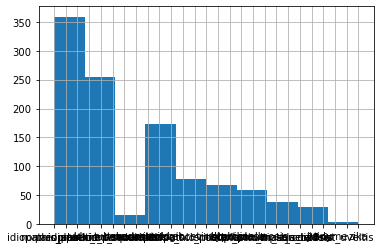

In [20]:
df.diagnosis.hist()

In [21]:
df.diagnosis.value_counts()

idiopathic_anterior         169
pars_planitis               145
nonneoplastic_masquerade    115
idiopathic_panuveitis       107
wds                          92
idiopathic_posterior         58
idiopathic_scleritis         57
vkh                          45
toxoplasmosis                34
presumed_sarcoidosis         33
bcr                          32
bx_proven_sarcoidosis        26
viral                        25
rheumatologic                24
hla_b27                      21
neoplastic_masquerade        21
behcet                       19
tuberculosis                 13
multiple_sclerosis           12
syphilis                     10
jia                           6
bartonella                    4
tinu                          2
toxocariasis                  2
not_uveitis                   1
zika                          1
lyme                          1
Name: diagnosis, dtype: int64

# 4.3 One Hote Encoding the other column
The "Other" column represents precondidional illnesses and are listed in combinations of them:
The illnesses are :

The numbers are already given to the combinations of the illneses. The goal is to make a table with 0 and 1 where
illnesses can be interpreted as combinations of illnesses and conditions.


- the point 2 and 3 has to be the same. so i have to rewrite the code there
- the maximum of different illnesses are 3
- there is one false row value with ";"

In [22]:
df['other'] = df['other'].replace(np.nan, 'nan', regex=True)
df['other'] = df['other'].str.lower()
df['other'] = df['other'].str.strip()
df[['O_1', 'O_2']] = df['other'].str.split(",|;",expand=True)
df['O_2'] = df['O_2'].replace(np.nan, 'nan', regex=True)
df['O_2'] = df['O_2'].str.strip()
df.loc[df['O_1'] == 'cr granuloma', 'O_1'] = 'granulomatous'
df.loc[df['O_1'] == 'choroidal granuloma', 'O_1'] = 'granulomatous'

otherlist1 = df['O_1'].unique().tolist()
otherlist2 = df['O_2'].unique().tolist()
otherlist1[3], otherlist1[6] = otherlist1[6], otherlist1[3]
for i in range(len(otherlist1)):
    df.loc[df['O_1'] == otherlist1[i], 'O_1'] = i
for i in range(len(otherlist2)):
    df.loc[df['O_2'] == otherlist2[i], 'O_2'] = i
dfotherlegend = pd.DataFrame(otherlist1, columns=['other'])

['nan', 'rv', 'cme', 'pars planitis']

In [23]:
#fist make one hot encoding with pandas.get_dummies
y1 = pd.get_dummies(df.O_1, prefix='o')
y2 = pd.get_dummies(df.O_2, prefix='o')
print(y1,y2)
#making the tables the same size
y2['O_4']=0
y2['O_5']=0
y2['O_6']=0
na1 = y1.to_numpy()
na2 = y2.to_numpy()
#the nan value is 1 on both arrys, that makes no sense, so i will put it on 0 for the second array.
na2[:, 0] =  0
#now lets just make matrix addition to layer it together
result = na1 +na2
#convert it back into a panda dataframe
dfother = pd.DataFrame(result)
#lets rename the columns
dfother = dfother.rename(columns={0: "o_0", 1: "o_1",  2: "o_2", 3: "o_3", 4: "o_4", 5: "o_5", 6: "o_6"})
#now merge the two dataframes
df = pd.concat([df, dfother], axis=1)
#and delete the other column, and the origins O_1 and O_2
df = df.drop(columns=['other','O_1','O_2','o_0'])

      o_0  o_1  o_2  o_3  o_4  o_5  o_6
0       1    0    0    0    0    0    0
1       1    0    0    0    0    0    0
2       1    0    0    0    0    0    0
3       1    0    0    0    0    0    0
4       1    0    0    0    0    0    0
...   ...  ...  ...  ...  ...  ...  ...
1070    0    0    0    0    0    0    1
1071    1    0    0    0    0    0    0
1072    1    0    0    0    0    0    0
1073    1    0    0    0    0    0    0
1074    1    0    0    0    0    0    0

[1075 rows x 7 columns]       o_0  o_1  o_2  o_3
0       1    0    0    0
1       1    0    0    0
2       1    0    0    0
3       1    0    0    0
4       1    0    0    0
...   ...  ...  ...  ...
1070    1    0    0    0
1071    1    0    0    0
1072    1    0    0    0
1073    1    0    0    0
1074    1    0    0    0

[1075 rows x 4 columns]


## 5. Ranges and there values

The ranges represent the healty value of a human. They are different because they were tested in different laberatories.
So it is not a acceptable values itself. We follow the strategy of categorising the actual value with the range and give it a ranking.
The ranges have to be handled differenty so we start with the values 1-16 who are all the same

In [24]:
#make a function to get a list with the assosiated columns
def vrString(m,M) :
    vlist = []
    for i in range(m,M+1):
        v = "v"+str(i)
        vMin = "v"+str(i)+"_m"
        vMax = "v"+str(i)+"_M"
        vtlist = [v,vMin,vMax]
        vlist.append(vtlist)
    return vlist



### 5.1 Different ranges 


In [25]:
### values 1-15
rangelist = vrString(0,15)
# Lupus Anticoagulant (v16)
df.v16.unique()
# v17 does not  exist
#Lysozyme, Plasma (v18)
rangelist.append(vrString(18,18)[0])
# v20 does not  exist
# v22 does have only 4 values = column will be dropped out
df = df.drop(columns=['v22','v22_m','v22_M'])
# v23 and 24 are only caped to the top
rangelist0 = vrString(23,24)
# v21
rangelist0.append(vrString(21,21)[0])
# v25 v26
rangelist.append(vrString(25,25)[0])
rangelist.append(vrString(26,26)[0])
# v27 is only caped to the top
rangelist0.append(vrString(27,27)[0])
# v34 35 v36 are only caped to the top
rangelist0.append(vrString(34,34)[0])
rangelist0.append(vrString(35,35)[0])
rangelist0.append(vrString(36,36)[0])
# v37 38 and 39 need a special treatment
#- They have no range
#- they either reactive/repeate reactive ore negative
#- the rest is nan
rangelist1 = vrString(37,38)

#### 5.3 Standatisise all values

In [26]:
#because we are using a method who is capable to hadle the needs of rangelist and ranglist0 we can just combine them 
rangelist = rangelist + rangelist0
rangelist

[['v0', 'v0_m', 'v0_M'],
 ['v1', 'v1_m', 'v1_M'],
 ['v2', 'v2_m', 'v2_M'],
 ['v3', 'v3_m', 'v3_M'],
 ['v4', 'v4_m', 'v4_M'],
 ['v5', 'v5_m', 'v5_M'],
 ['v6', 'v6_m', 'v6_M'],
 ['v7', 'v7_m', 'v7_M'],
 ['v8', 'v8_m', 'v8_M'],
 ['v9', 'v9_m', 'v9_M'],
 ['v10', 'v10_m', 'v10_M'],
 ['v11', 'v11_m', 'v11_M'],
 ['v12', 'v12_m', 'v12_M'],
 ['v13', 'v13_m', 'v13_M'],
 ['v14', 'v14_m', 'v14_M'],
 ['v15', 'v15_m', 'v15_M'],
 ['v18', 'v18_m', 'v18_M'],
 ['v25', 'v25_m', 'v25_M'],
 ['v26', 'v26_m', 'v26_M'],
 ['v23', 'v23_m', 'v23_M'],
 ['v24', 'v24_m', 'v24_M'],
 ['v21', 'v21_m', 'v21_M'],
 ['v27', 'v27_m', 'v27_M'],
 ['v34', 'v34_m', 'v34_M'],
 ['v35', 'v35_m', 'v35_M'],
 ['v36', 'v36_m', 'v36_M']]

In [27]:
for i in range(len(rangelist)):
    j = 0
    df[rangelist[i][j]] = df[rangelist[i][j]].astype(str).str.replace('<','')
    df[rangelist[i][j]] = df[rangelist[i][j]].astype(str).str.replace('>','')
    df[rangelist[i][j]] = df[rangelist[i][j]].astype(str).str.replace('=','')
    df[rangelist[i][j]] = df[rangelist[i][j]].replace(np.nan, 'nan', regex=True)
    df.loc[df[rangelist[i][j]] == 'neg', rangelist[i][j]] = 0.5
    df.loc[df[rangelist[i][j]] == 'NEG', rangelist[i][j]] = 0.5
    df.loc[df[rangelist[i][j]] == 'NEGATIVE', rangelist[i][j]] = 0.5
    df.loc[df[rangelist[i][j]] == 'see note | In-house test down.  Test re-ordered and sent to Referral L', rangelist[i][j]] = np.nan
    df.loc[df[rangelist[i][j]] == 'SEE BELOW | RF10  IU/mL Test run on Siemens BN II (formerly Dade Beh', rangelist[i][j]] = np.nan
    df.loc[(df[rangelist[i][j]]=='-----' ), rangelist[i][j]]= np.nan
    df.loc[(df[rangelist[i][j]]=='cancelled' ), rangelist[i][j]]= np.nan
    df[rangelist[i][j]]= df[rangelist[i][j]].astype(float)
    df[rangelist[i][j+1]]= df[rangelist[i][j+1]].astype(float)
    df[rangelist[i][j+2]]= df[rangelist[i][j+2]].astype(float)
    df[rangelist[i][j]]= (df[rangelist[i][j]]-df[rangelist[i][j+1]])/(df[rangelist[i][j+2]]-df[rangelist[i][j+1]])

#

#### 5.4 Handeling the Rest 

In [28]:
#v16
df['v16'] = df['v16'].replace(np.nan, 'nan', regex=True)
v16list = df.v16.unique().tolist()
v16listNan = [ x for x in v16list if "NEGATIVE" not in x ]
v16listNan = [ x for x in v16listNan if "POSITIVE" not in x ]
for i in range(len(v16listNan)):
    df.loc[df['v16'] == v16listNan[i], 'v16'] = np.nan
df.loc[df['v16'] == 'NEGATIVE|see below | Duplicate order. Test not performed. Request canc', 'v16'] = 'negative'
df['v16'] = df['v16'].str.lower()
df['v16'].astype('category')

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1070    negative
1071         NaN
1072         NaN
1073    negative
1074    negative
Name: v16, Length: 1075, dtype: category
Categories (2, object): ['negative', 'positive']

In [29]:
#v37
df.loc[df['v37'] == 'NEGATIVE', 'v37'] = 0
df.loc[df['v37'] == 'REACTIVE', 'v37'] = 1
df.loc[df['v37'] == 'REPEAT REACTIVE', 'v37'] = 1
df.loc[df['v37'] == 'INVALID RESULT', 'v37'] = np.nan

#v38
df.loc[df['v38'] == 'NEGATIVE', 'v38'] = 0
df.loc[df['v38'] == 'see note | POSITIVE RESULT S/CO ratio is >5.0.  Confirmatory testing i', 'v38'] = 1
df.loc[df['v38'] == 'see below | POSITIVE RESULT S/CO ratio is >5.0.  Confirmatory testing ', 'v38'] = 1
df.loc[df['v38'] == 'INVALID RESULT', 'v38'] = np.nan
df.loc[df['v38'] == 'NOTE:', 'v38'] = np.nan

#v39
df.loc[df['v39'] == 'NEGATIVE', 'v39'] = 0
df.loc[df['v39'] == 'REACTIVE', 'v39'] = 1
df.loc[df['v39'] == 'INVALID RESULT', 'v39'] = np.nan

## 7. Finish Numbersmatrix
For calculculating with machine learning tools it is very important, that the values are numbers not
Strings. After the whole calculation we drop all information who is not needed.
- the ranges
    - the min and max
- the uom's

In [30]:
droplist = [col for col in df.columns if 'm' in col]
droplist1 = [ x for x in df.columns if "M" in x ]
droplistX = droplist + droplist1
df = df.drop(columns=droplistX)

In [31]:
#v21,v35,v36
df.v2.unique()
rangelist0

[['v23', 'v23_m', 'v23_M'],
 ['v24', 'v24_m', 'v24_M'],
 ['v21', 'v21_m', 'v21_M'],
 ['v27', 'v27_m', 'v27_M'],
 ['v34', 'v34_m', 'v34_M'],
 ['v35', 'v35_m', 'v35_M'],
 ['v36', 'v36_m', 'v36_M']]

### dropping scleritis and not_uveitis
- these values are only occures one time

In [32]:
dfClean = df[~df.categorical.isin(['not_uveitis','scleritis','unknown'])]

In [33]:
dfClean['categorical'].value_counts()

idiopathic                  531
systemic                    191
wds                         124
nonneoplastic masquerade    117
infectious                   87
neoplastic masquerade        22
Name: categorical, dtype: int64

# train test split
- stratify with stratify parameter

In [34]:
from sklearn.preprocessing import LabelEncoder
dfClean = dfClean.fillna(dfClean.mean())
#dropping all categorical values and
dfX = dfClean.drop(columns=['categorical','diagnosis','sex','v16','v37','v38','v39'])
dfy = dfClean['categorical']
X = dfX.values
y = dfy.values
yy = LabelEncoder().fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, yy,
                                                    stratify=yy,
                                                    test_size=0.2)

0. idiopathic
1. Infectious
2. Neo Masq
3. Nonneo Masq
4. systemic
5. wds


0    424
4    153
5     99
3     93
1     70
2     18
dtype: int64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

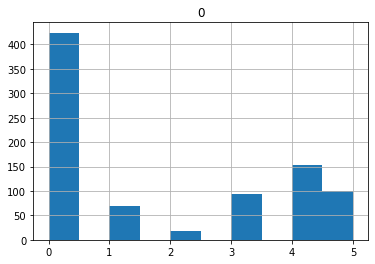

In [35]:
dfXtrain = pd.DataFrame(X_train)
dfytrain = pd.DataFrame(y_train)
print(dfytrain.value_counts())
dfytrain.hist()

0    107
4     38
5     25
3     24
1     17
2      4
dtype: int64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

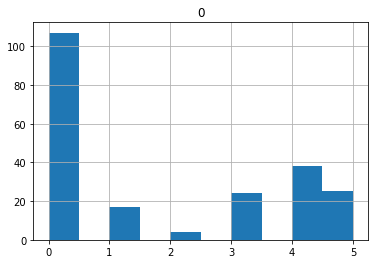

In [36]:
dfXtest = pd.DataFrame(X_test)
dfytest = pd.DataFrame(y_test)
print(dfytest.value_counts())
dfytest.hist()


# oversampling

In [37]:
#get rid of categorical values
loclist = dfXtrain[0].unique().tolist()
for i in range(len(loclist)):
    dfXtrain.loc[dfXtrain[0] == loclist[i], 0] = i
loclist

['posterior', 'intermediate', 'pan', 'anterior', 'scleritis', 'unknown']

In [38]:
#converte all categorical values
for i in dfXtrain.columns.tolist():
    try: 
        dfXtrain[i] = dfXtrain[i].astype('float')
    except :
        dfXtrain[i] = dfXtrain[i].astype('category')
dfXtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       857 non-null    float64
 1   1       857 non-null    float64
 2   2       857 non-null    float64
 3   3       857 non-null    float64
 4   4       857 non-null    float64
 5   5       857 non-null    float64
 6   6       857 non-null    float64
 7   7       857 non-null    float64
 8   8       857 non-null    float64
 9   9       857 non-null    float64
 10  10      857 non-null    float64
 11  11      857 non-null    float64
 12  12      857 non-null    float64
 13  13      857 non-null    float64
 14  14      857 non-null    float64
 15  15      857 non-null    float64
 16  16      857 non-null    float64
 17  17      857 non-null    float64
 18  18      857 non-null    float64
 19  19      857 non-null    float64
 20  20      857 non-null    float64
 21  21      857 non-null    float64
 22  22

In [39]:
dfytrain = pd.DataFrame(y_train)
#converte all categorical values
for i in dfytrain.columns.tolist():
    try: 
        dfytrain[i] = dfytrain[i].astype('float')
    except :
        dfytrain[i] = dfytrain[i].astype('category')
dfytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       857 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [42]:
X = dfXtrain.values
yy = dfytrain.values

In [44]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, yy)

In [45]:
dfyOverfit = pd.DataFrame(y_resampled)
dfXOverfit = pd.DataFrame(X_resampled)
print(dfyOverfit.value_counts())
print("total counts of values ", dfyOverfit.size)

5.0    424
4.0    424
3.0    424
2.0    424
1.0    424
0.0    424
dtype: int64
total counts of values  2544


# combination

In [46]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_combi, y_combi = sme.fit_resample(X, yy)

dfyCross = pd.DataFrame(y_combi)
dfXCross = pd.DataFrame(X_combi)


# export

In [47]:
import json
#os.remove('data/uveitis_data_diagnosis.csv')
with open('data/uveitis_data_legend.json', 'w') as fp:
    json.dump(shorted_dict, fp)

#full csv
os.remove('data/uveitis_data.csv')
df.to_csv('data/uveitis_data.csv', index = False)

#x_train
os.remove('data/uveitis_data_xtrain.csv')
dfXtrain.to_csv('data/uveitis_data_xtrain.csv', index = False)
#y_train
os.remove('data/uveitis_data_ytrain.csv')
dfytrain.to_csv('data/uveitis_data_ytrain.csv', index = False)
#y_test
os.remove('data/uveitis_data_ytest.csv')
dfytest.to_csv('data/uveitis_data_ytest.csv', index = False)
#x_test
os.remove('data/uveitis_data_xtest.csv')
dfXtest.to_csv('data/uveitis_data_xtest.csv', index = False)

In [48]:
#x_resampled(overfitted)_train
#os.remove('data/uveitis_data_XOverfit_train.csv')
dfXOverfit.to_csv('data/uveitis_data_XOverfit_train.csv', index = False)
#x_resampled(overfitted)_train
os.remove('data/uveitis_data_yOverfit_train.csv')
dfyOverfit.to_csv('data/uveitis_data_yOverfit_train.csv', index = False)

In [49]:
#x_crosampled(overfitted/underfitted)_train
#os.remove('data/uveitis_data_XCrossfit_train.csv')
dfXCross.to_csv('data/uveitis_data_XCrossfit_train.csv', index = False)
#y_combination(overfitted/underfitted)_train
#os.remove('data/uveitis_data_yCrossfit_train.csv')
dfyCross.to_csv('data/uveitis_data_yCrossfit_train.csv', index = False)

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_resampled,y_resampled, cv=10)
DTclf = clf.fit(X_resampled,y_resampled)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_5 <= 0.00
|   |   |--- feature_6 <= 0.00
|   |   |   |--- feature_11 <= 0.15
|   |   |   |   |--- feature_19 <= 0.57
|   |   |   |   |   |--- feature_20 <= 0.75
|   |   |   |   |   |   |--- feature_21 <= 0.84
|   |   |   |   |   |   |   |--- feature_32 <= 1.03
|   |   |   |   |   |   |   |   |--- feature_18 <= 0.36
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.11
|   |   |   |   |   |   |   |   |   |   |--- class: 5.0
|   |   |   |   |   |   |   |   |   |--- feature_9 >  0.11
|   |   |   |   |   |   |   |   |   |   |--- feature_16 <= 0.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_16 >  0.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_18 >  0.36
|   |   |   |   |   |   |   |   |   |--- feature_13 <= -0.31
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   | 

In [51]:
dfXOverfit

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.0,0.0,0.0,0.25089,0.271676,0.0,0.0,1.000000,0.672566,0.080160,...,0.016667,0.500000,0.500000,0.769231,1.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.550000,0.849558,0.921844,...,0.016667,0.500000,0.500000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,1.0,0.0,0.0,0.00000,0.271676,0.0,0.0,0.288889,0.831858,0.739479,...,0.016667,0.248897,0.312440,1.000000,0.0,0.0,0.0,0.000000,0.0,1.0
3,2.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.850000,0.070588,0.040080,...,0.016667,0.248897,0.312440,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,2.0,1.0,0.5,2.00000,1.000000,0.0,0.0,0.533333,0.223529,0.092184,...,0.016667,0.248897,0.312440,1.000000,1.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.252614,0.678954,0.834713,...,0.016667,0.248897,0.312440,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2540,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.403532,0.593668,0.836877,...,0.016667,0.064407,0.069010,1.000000,0.0,0.0,0.0,0.927566,0.0,0.0
2541,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.748693,0.608196,0.095071,...,0.016667,0.050000,0.050000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2542,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.275518,0.554064,0.222404,...,0.016667,0.248897,0.312440,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0
